# PyOpenMS - Feature extraction & 2 ML classifiers

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyopenms

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

## Data Import - EC01.mzXML

In [4]:
from urllib.request import urlretrieve
# from urllib import urlretrieve  # use this code for Python 2.x
#gh = "https://raw.githubusercontent.com/OpenMS/OpenMS/develop"
#urlretrieve (gh +"/src/tests/topp/FeatureFinderCentroided_1_input.mzML", "feature_test.mzML")

from pyopenms import *

# Prepare data loading (save memory by only
# loading MS1 spectra into memory)
options = PeakFileOptions()
options.setMSLevels([1])
fh = MzXMLFile()
fh.setOptions(options)

# Load data
input_map = MSExperiment()
fh.load("/home/user/Downloads/week10/EC01.mzXML", input_map)
input_map.updateRanges()

ff = FeatureFinder()
ff.setLogType(LogType.CMD)

# Run the feature finder
name = "centroided"
features = FeatureMap()
seeds = FeatureMap()
params = FeatureFinder().getParameters(name)
ff.run(name, input_map, features, params, seeds)

features.setUniqueIds()
fh = FeatureXMLFile()
fh.store("output.featureXML", features)
print("Found", features.size(), "features")

Found 56433 features


## Feature extraction

In [61]:
RT=[]
MZ=[]
f0 = features[0]
for f in features:
    RT.append(f.getRT())
    MZ.append(f.getMZ())
    
print(len(RT))
print(len(MZ))
X= list(zip(RT,MZ))
X

56433
56433


[(5195.617857060939, 982.9918451650522),
 (5195.801233694637, 982.9977045400522),
 (5195.431703456524, 982.985985790052),
 (4521.237791724421, 901.4720458984376),
 (4047.381796924473, 586.3350219726562),
 (4663.148927812177, 748.435302734375),
 (3658.754532862407, 514.3009033203125),
 (4047.3367166207727, 586.337158203125),
 (4015.4166003813807, 581.3203125),
 (4521.197641033542, 901.4769287109376),
 (5441.257906323443, 994.8565019199305),
 (3363.5668568745687, 478.7939758300781),
 (4521.272437559867, 901.4671020507812),
 (4663.168320759937, 748.431884765625),
 (3658.7390312096, 514.2992553710938),
 (5196.034414817504, 983.003563915052),
 (4776.38288041407, 805.8718872070312),
 (3948.098269597841, 622.8558959960939),
 (4718.545493931684, 870.4913330078124),
 (3947.5430020684635, 622.8582763671875),
 (4984.225757840576, 594.3262329101562),
 (4015.580304768538, 581.3223266601562),
 (5441.213533796014, 994.862483365243),
 (4047.4469680552957, 586.3329467773438),
 (3363.857210446003, 478.7

## k Means Clustering - ML 1

In [6]:
from sklearn.cluster import KMeans
import numpy as np


In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
test = kmeans.labels_

In [8]:
test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [9]:
kmeans.cluster_centers_

array([[4627.6570376 ,  737.61689155],
       [2807.93344708,  580.65062804]])

In [59]:
y = np.array(test)
len(y)

56433

In [60]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [67]:
len(X)

56433

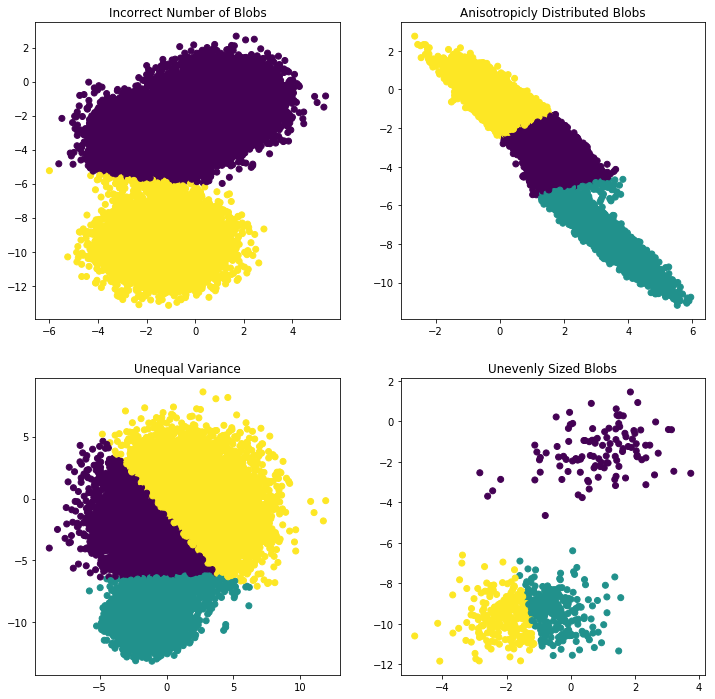

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 56433
random_state = 2
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## k Nearest Neighbours - ML 2

In [12]:
#from scipy import sklearn
from sklearn.neighbors import NearestNeighbors
#from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)
#nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn_pipe = Pipeline([('knn', knn)])
knn_pipe.fit(X_train, y_train)
knn.fit(X_train, y_train)
#nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
#nca_pipe.fit(X_train, y_train)
#nca.fit(X_train, y_train)%%

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
print(knn_pipe.score(X_test, y_test))

0.9333333333333333


In [14]:
conda install -c conda-forge xgboost=0.6a2

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - xgboost=0.6a2 -> python[version='2.7.*|3.5.*|3.6.*|3.4.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.




Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install xgboost

     |████████████████████████████████| 127.6 MB 3.1 kB/s  eta 0:00:01█████████████████            | 80.0 MB 44 kB/s eta 0:17:38�████████▎           | 80.8 MB 39 kB/s eta 0:20:01��███████████████████▎           | 80.9 MB 39 kB/s eta 0:19:56 MB 39 kB/s eta 0:19:52��████▍           | 81.3 MB 39 kB/s eta 0:19:47 eta 0:19:38█▌           | 81.8 MB 39 kB/s eta 0:19:33�████████████▋           | 82.0 MB 39 kB/s eta 0:19:28      | 82.4 MB 44 kB/s eta 0:16:56████████████████████▊           | 82.7 MB 44 kB/s eta 0:16:489 MB 44 kB/s eta 0:16:44█████▉           | 83.1 MB 44 kB/s eta 0:16:40�█████████████████           | 83.3 MB 44 kB/s eta 0:16:36s eta 0:16:32�██           | 83.7 MB 44 kB/s eta 0:16:28     | 83.9 MB 11 kB/s eta 1:00:46�█████████           | 84.1 MB 11 kB/s eta 1:00:31a 1:00:16�████████████▏          | 84.4 MB 11 kB/s eta 1:00:01��████████████████████▎          | 84.8 MB 11 kB/s eta 0:59:31��█████▎          | 85.0 MB 11 kB/s eta 0:59:16/s eta 0:59:02�█████████▌          | 85.5 MB 10

Test set score: 0.9957
[1.         1.         0.99327957 0.99865591 0.99865591 0.99731183
 0.99731183 0.9905914  0.99731183 0.99865591 0.99462366 0.99731183
 0.99596231 0.99596231 0.99192463 0.99596231 0.99596231 1.
 0.99596231 1.         0.99730821 0.99730821 0.9986541  0.99596231
 0.9986541  0.99730821 1.         0.9986541  0.99461642 0.99595687
 0.99595687 0.99730458 0.99865229 0.99865229 0.99730458 0.99730458
 0.99730458 1.         0.99730458 0.99730458 0.99730458 1.
 0.99865229 1.         0.99595687 0.99730458 0.99865229 1.
 0.99595687 0.99865229 0.99730458 0.99326146 0.99865229 0.99595687
 0.99595687 0.99730458 0.99730458 0.99056604 1.         0.99865229
 0.99730458 0.99865229 0.99730458 0.99595687 0.99460916 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
cv_scores mean:0.997608213554421
0.9999978644411296


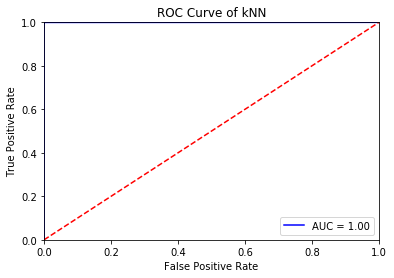

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

data = "/home/user/Downloads/week10/output.featureXML"
X = list(zip(RT,MZ))
y = np.array(test)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 1000)
knn.fit(X_train,y_train)
knn.predict(X_test)[0:10]
knn.score(X_test,y_test)

print("Test set score: {:.4f}".format(knn.score(X_test, y_test)))

knn_cv = KNeighborsClassifier(n_neighbors=1000)
cv_scores = cross_val_score(knn_cv, X, y, cv=76)
print(cv_scores)
print('cv_scores mean:{}' .format(np.mean(cv_scores)))

XGBClassifier(
    n_jobs = 1,
    objective = 'multi:softmax',
    silent=1,
    tree_method='approx'
)

y_scores = knn.predict_proba(X_test)
#y_scores = cross_val_score(knn_cv, X, y, cv=5)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

XGBClassifier(
    n_jobs = 1,
    objective = 'multi:softmax',
    silent=1,
    tree_method='approx'
)


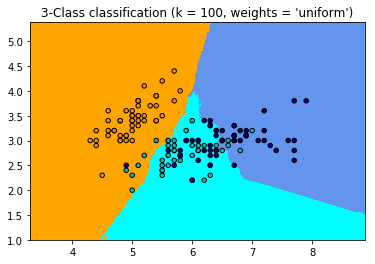

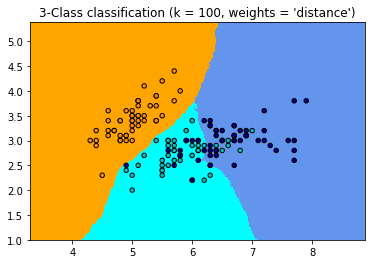

In [75]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 100

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Logistic Regression - ML 3

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


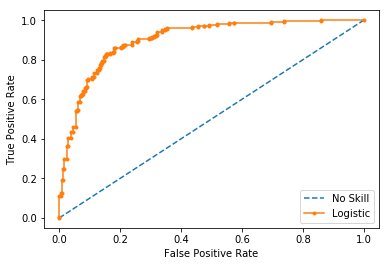

In [32]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()